In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

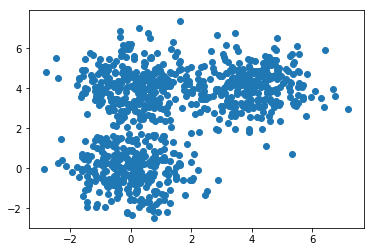

In [2]:
D, s = 2, 4
mu1 = np.array([0, 0])
mu2 = np.array([s, s])
mu3 = np.array([0, s])

N = 900
X = np.zeros((N, D))
X[:300, :] = np.random.randn(300, D) + mu1
X[300:600, :] = np.random.randn(300, D) + mu2
X[600:, :] = np.random.randn(300, D) + mu3

plt.scatter(X[:, 0], X[:, 1])

In [25]:
def distance(u, v):
    diff = u - v
    return diff.dot(diff)

def cost(X, R, M):
    costs = 0
    for k in range(len(M)):
        for n in range(len(X)):
            costs += R[n, k] * distance(M[k], X[n])
    return costs
    
def plot_k_means(X, K, max_iter=20, beta=1.0):
    N, D = X.shape
    M = np.zeros((K, D))
    R = np.zeros((N, K))
    
    # Initialize M to choose random points
    for k in range(K):
        M[k] = X[np.random.choice(N)]
    
    grid_width = 5
    grid_height = max_iter / grid_width
    random_colors = np.random.random((K, 3))
    plt.figure()
    
    costs = np.zeros(max_iter)
    
    # Soft K-Means
    for i in range(max_iter):
        colors = R.dot(random_colors)
        plt.subplot(grid_width, grid_height, i + 1)
        plt.scatter(X[:, 0], X[:, 1], c=colors)
        
        for k in range(K):
            for n in range(N):
                R[n, k] = np.exp(-beta * distance(M[k], X[n])) / np.sum(np.exp(-beta * distance(M[j], X[n])) for j in range(K))
        
        for k in range(K):
            M[k] = R[:, k].dot(X) / R[:, k].sum()
        
        costs[i] = cost(X, R, M)
        
        if i > 0:
            if np.abs(costs[i] - costs[i - 1]) < 0.1:
                break
    plt.show()
    plt.plot(costs)
    plt.title('Costs')
    plt.show()

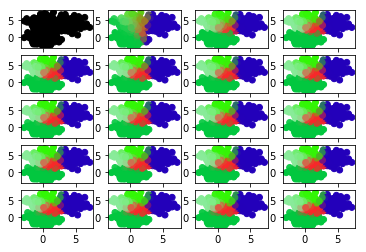

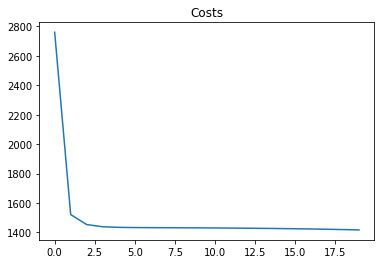

In [27]:
plot_k_means(X, 5)

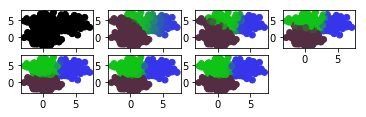

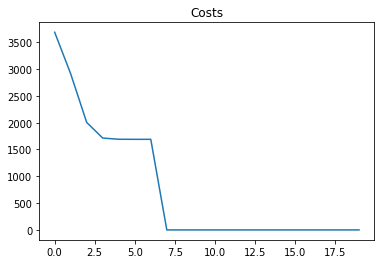

In [28]:
plot_k_means(X, 3)

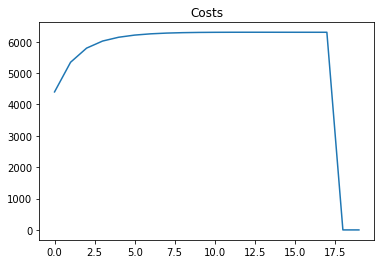

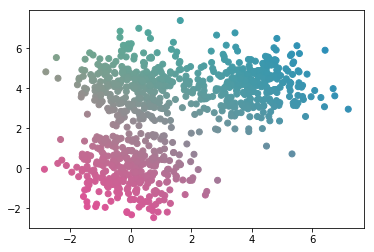

In [10]:
plot_k_means(X, 3, beta=0.1)